In [1]:
import cv2

In [2]:
!pip install deepface

In [3]:
from deepface import DeepFace

In [4]:
img = cv2.imread(r"C:\Users\rishi\Desktop\face emotion recognition\happy.jpeg")

In [5]:
import matplotlib.pyplot as plt

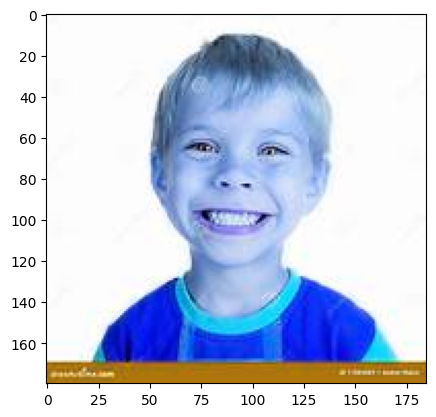

In [6]:
plt.imshow(img)

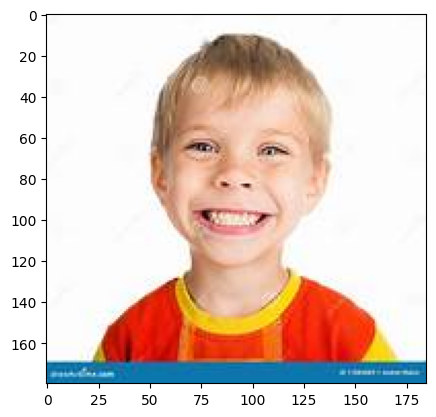

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
predictions = DeepFace.analyze(img)

Action: gender:  50%|█████     | 2/4 [00:01<00:01,  1.16it/s] 

25-02-09 05:31:48 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\rishi\.deepface\weights\gender_model_weights.h5
100%|██████████| 537M/537M [10:22<00:00, 863kB/s] 
Action: race:  75%|███████▌  | 3/4 [10:27<04:46, 286.09s/it]  

25-02-09 05:42:13 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\rishi\.deepface\weights\race_model_single_batch.h5
100%|██████████| 537M/537M [06:48<00:00, 1.31MB/s]
Action: race: 100%|██████████| 4/4 [17:18<00:00, 259.73s/it]


In [9]:
predictions

[{'emotion': {'angry': 3.5931895394461075e-07,
   'disgust': 6.343487044811208e-10,
   'fear': 0.0001377104531002401,
   'happy': 99.06821262023298,
   'sad': 0.00013517392952279143,
   'surprise': 0.00028925022623970504,
   'neutral': 0.9312189936674841},
  'dominant_emotion': 'happy',
  'region': {'x': 48,
   'y': 32,
   'w': 91,
   'h': 91,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.91,
  'age': 16,
  'gender': {'Woman': 1.5964731574058533, 'Man': 98.40351939201355},
  'dominant_gender': 'Man',
  'race': {'asian': 0.1176648773252964,
   'indian': 0.013081425277050585,
   'black': 0.0006585966730199289,
   'white': 96.22495770454407,
   'middle eastern': 1.4837419614195824,
   'latino hispanic': 2.159894071519375},
  'dominant_race': 'white'}]

In [10]:
type(predictions)

list

In [11]:
dominant_emotion = predictions[0]['dominant_emotion']

In [12]:
print("Dominant emotion:", predictions[0]['dominant_emotion'])

Dominant emotion: happy


In [13]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

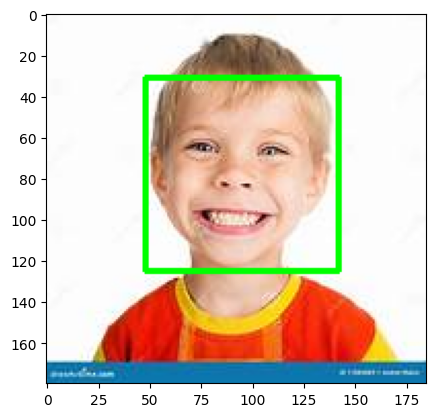

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
            dominant_emotion,
            (0, 50),
            font, 1,
            (0, 0, 255),
            2,
            cv2.LINE_4)

array([[[255, 255, 255],
        [255, 255, 255],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [251, 251, 251]],

       [[255, 255, 255],
        [253, 253, 253],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [251, 251, 251]],

       [[252, 252, 252],
        [251, 251, 251],
        [249, 249, 249],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [251, 251, 251]],

       ...,

       [[165, 114,  18],
        [156, 107,   9],
        [171, 120,  24],
        ...,
        [173, 118,  14],
        [173, 118,  14],
        [173, 118,  14]],

       [[184, 131,  34],
        [166, 116,  16],
        [165, 112,  15],
        ...,
        [174, 119,  15],
        [174, 119,  15],
        [173, 118,  14]],

       [[179, 127,  27],
        [168, 116,  16],
        [167, 115,  15],
        ...,
        [175, 120,  16],
        [175, 120,  16],
        [173, 118,  14]]

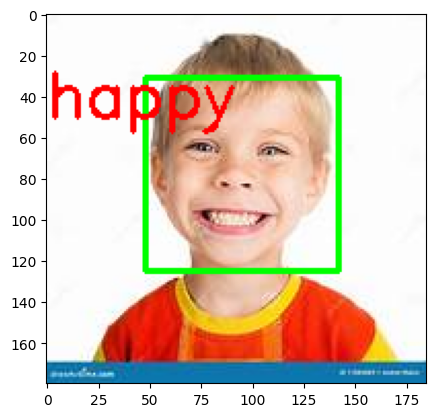

In [27]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [1]:
import cv2
from deepface import DeepFace

# Load Haar cascade for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break  # If no frame is captured, exit

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    dominant_emotion = "Unknown"
    
    try:
        # Analyze emotion (only if a face is detected)
        if len(faces) > 0:
            result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            dominant_emotion = result[0]['dominant_emotion']
    except Exception as e:
        print("Error:", e)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display detected emotion
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, dominant_emotion, (10, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Show output
    cv2.imshow('Emotion Detection', frame)

    # Quit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
